In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import wavfile
from scipy import stats
from scipy import signal
%matplotlib inline

In [16]:
import seaborn.apionly as sns
%matplotlib inline

In [2]:
import IPython

In [3]:
def gaussian_mean_std(x_data, y_data, x_smooth, h):
    results_mean = np.zeros_like(x_smooth)
    results_std = np.zeros_like(x_smooth)
    for i in np.arange(len(x_smooth)):
        weights = stats.norm.pdf((x_data - x_smooth[i]), scale=h)
        normalize = np.sum(weights)
        results_mean[i] = np.dot(weights, y_data)/normalize
        results_std[i] = np.sqrt(np.sum(weights*(y_data - results_mean[i])**2) / normalize)
    return results_mean, results_std

In [4]:
from scipy.stats import gaussian_kde
from scipy import signal

In [5]:
sampling, data_raw = wavfile.read('Popcorn.wav')

In [6]:
print(sampling)

48000


In [120]:
data = data_raw[:,0]

In [121]:
dt = (1./sampling)
num_points = len(data)

In [122]:
times = np.arange(num_points)*dt

In [123]:
times_ds = times[::2]
data_ds = np.abs(data[::2]).astype(float)
rate = (1./(times_ds[1] - times_ds[0]))
print('%.1f samples/sec'%rate)

24000.0 samples/sec


In [124]:
in_range = (times_ds <= 30)
np.mean(data_ds[in_range])

677.17220948304237

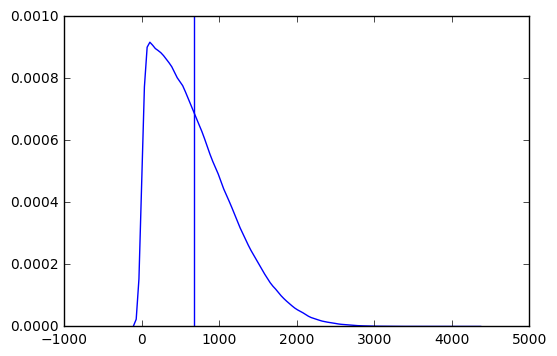

In [125]:
sns.kdeplot(data_ds[in_range])
plt.axvline(x=np.mean(data_ds[in_range]))
# 
# plt.yscale('log')

In [126]:
data_test = np.copy(data_ds)
data_test[data_test >= 1500.] = 1500.

In [127]:
np.mean(data_test)

688.94322817074999

In [128]:
data_ds -= np.mean(data_test)

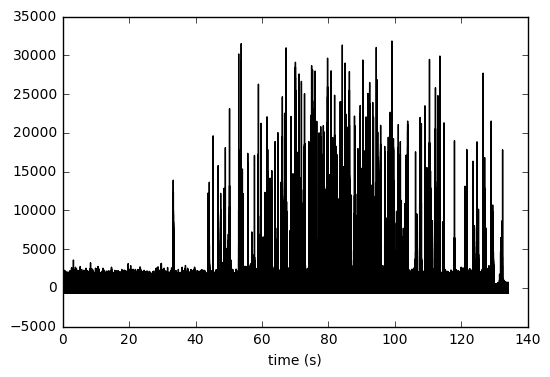

In [129]:
plt.plot(times_ds, data_ds,'k-')
plt.xlabel('time (s)')
# plt.ylim([0, 5000])

(0.0, 35000.0)

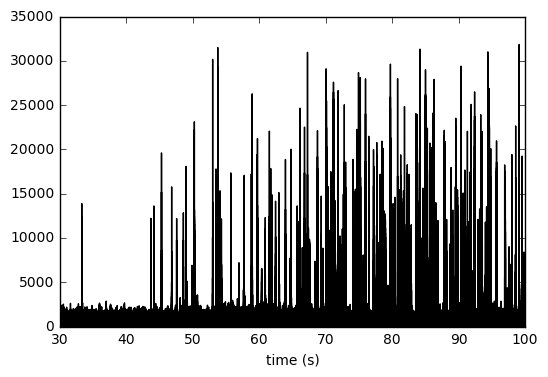

In [130]:
tmin, tmax = 30, 100
idxrange = ((times_ds >= tmin)&(times_ds < tmax))
plt.plot(times_ds[idxrange], data_ds[idxrange],'k-')
plt.xlabel('time (s)')
plt.ylim(ymin=0.)

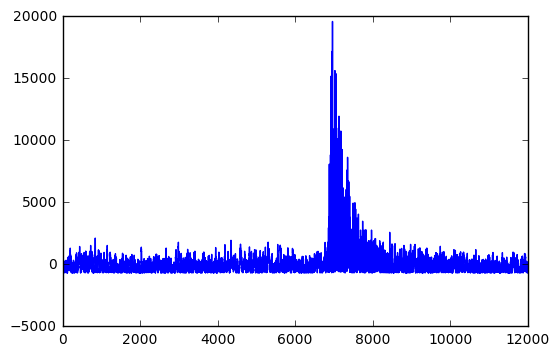

In [131]:
in_range = (times_ds <= 45.5) &(times_ds >= 45)
plt.plot(data_ds[in_range])

In [166]:
width = 200

In [167]:
convolved = signal.fftconvolve(data_ds, signal.gaussian(10*width, width)/width, mode='same')

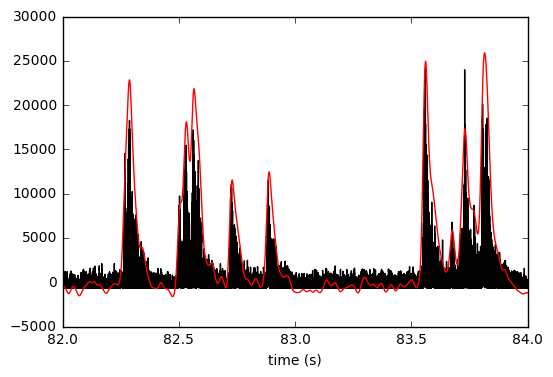

In [168]:
tmin, tmax = 82,84
idxrange = ((times_ds >= tmin)&(times_ds < tmax))
plt.plot(times_ds[idxrange], data_ds[idxrange],'k-')
plt.plot(times_ds[idxrange], convolved[idxrange]*np.sqrt(2*np.pi), 'r-')
plt.xlabel('time (s)')
# plt.ylim(ymin=1000)

In [179]:
def plot_listen(times, data, convolved, tmin, tmax, k_thin=1000, min_level=4000.,rate=4000):
    convolved_thin = convolved[::k_thin]
    ids = signal.argrelmax(convolved_thin)[0]
    ids = ids[convolved_thin[ids] > min_level]
    idxrange = ((times >= tmin)&(times < tmax))
    plt.plot(times[idxrange] - tmin, data[idxrange],'k-')
    count = 0
    for i in ids:
        t = times[i*k_thin]
        if (t <= tmax) and (t >= tmin):
            plt.axvline(x=t-tmin, ls='-', color='r')
            count += 1
    plt.xlabel('time - %.1f(s)'%(tmin))
    plt.ylim([100, 10000])
    plt.title('Min Level: %.1e, %d counts'%(min_level, count))
    return IPython.display.Audio(data=data[idxrange], rate=rate, autoplay=True)

In [ ]:
ids = signal.argrelmax[convolved[::1]]

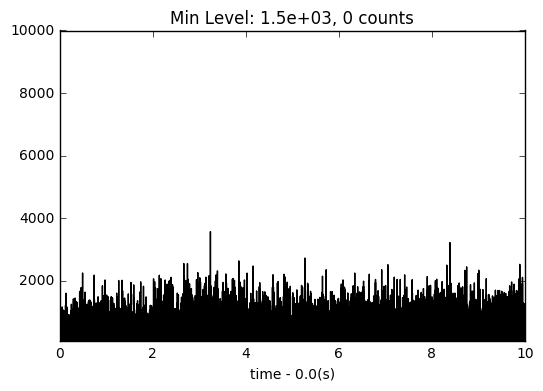

In [170]:
plot_listen(times_ds, data_ds, convolved, 0, 10, min_level=1500., rate=rate)

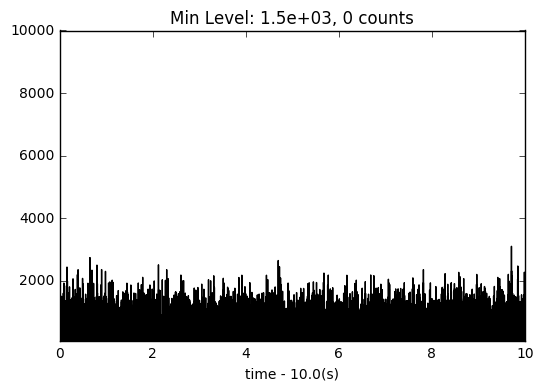

In [171]:
plot_listen(times_ds, data_ds, convolved, 10, 20, min_level=1500., rate=rate)

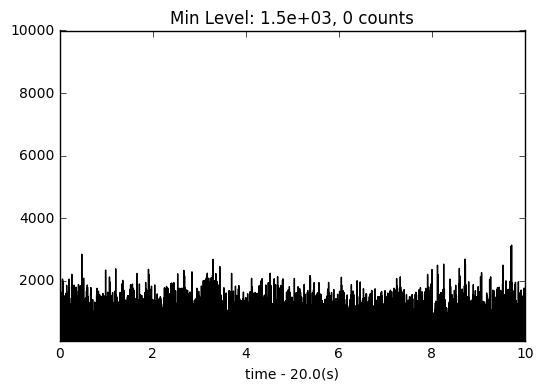

In [172]:
plot_listen(times_ds, data_ds, convolved, 20, 30, min_level=1500., rate=rate)

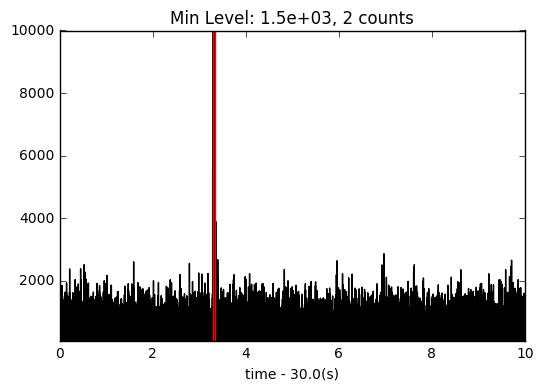

In [163]:
plot_listen(times_ds, data_ds, convolved, 30, 40, min_level=1500., rate=rate)

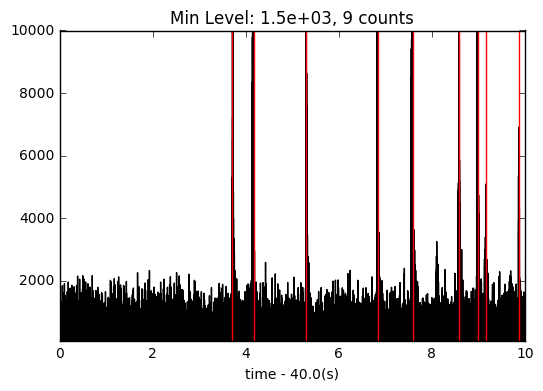

In [180]:
plot_listen(times_ds, data_ds, convolved, 40, 50, min_level=1500., rate=rate)

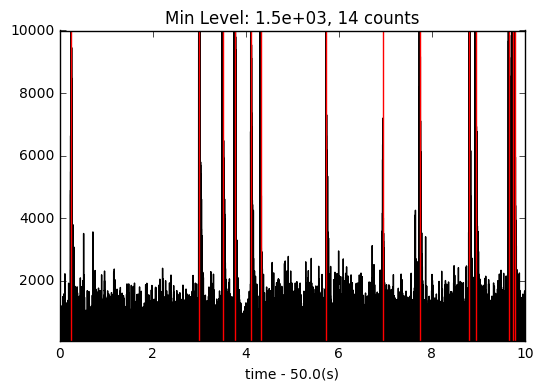

In [182]:
plot_listen(times_ds, data_ds, convolved, 50, 60, min_level=1500., rate=rate, k_thin=100)

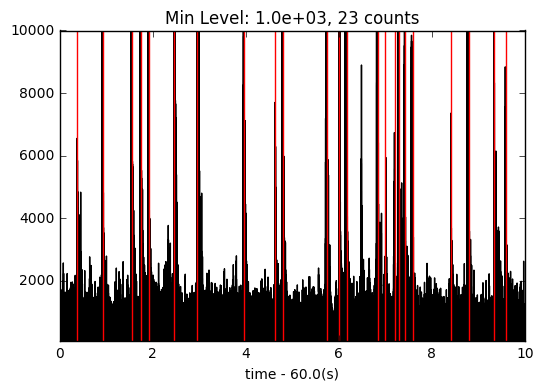

In [184]:
plot_listen(times_ds, data_ds, convolved, 60, 70, min_level=1500., rate=rate)

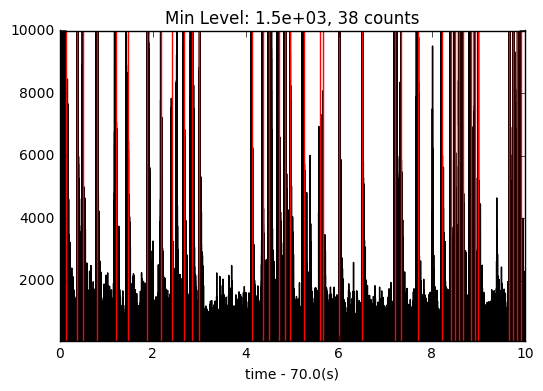

In [177]:
plot_listen(times_ds, data_ds, convolved, 70, 80, min_level=1500., rate=rate, k_thin=1000)

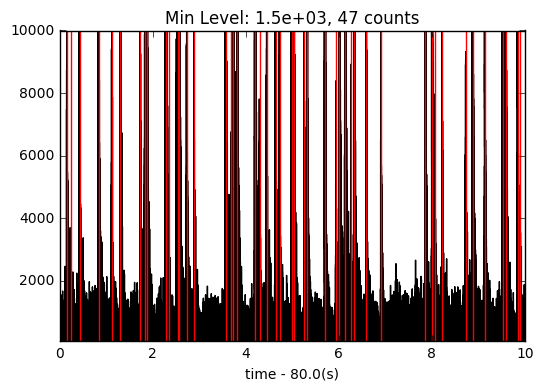

In [150]:
plot_listen(times_ds, data_ds, convolved, 80, 90, min_level=1500., rate=rate)

In [190]:
convolved_thin = convolved
ids = signal.argrelmax(convolved_thin)[0]
ids = ids[convolved_thin[ids] > 1500.]

In [191]:
len(ids)

242

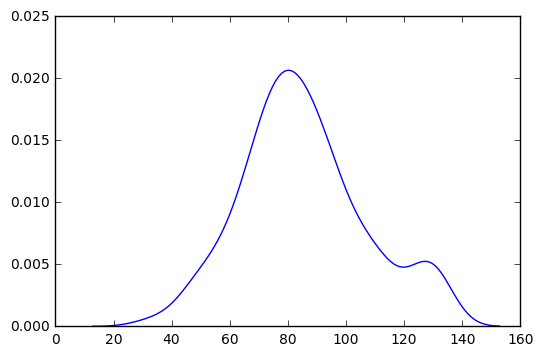

In [192]:
sns.kdeplot(times_ds[ids])

In [236]:
delta_times = []
for i in range(len(ids)):
    for j in range(len(ids)):
        if i >= j:
            continue
        delta_times.append(np.abs(times_ds[ids[i]] - times_ds[ids[j]]))
delta_times = np.array(delta_times)

In [237]:
nt = 1000
ts = np.linspace(0, 100, nt)

In [245]:
vals = np.zeros(nt)
for dt in delta_times:
    vals += stats.norm.pdf(ts, loc=dt, scale=2.)
vals /= len(delta_times)

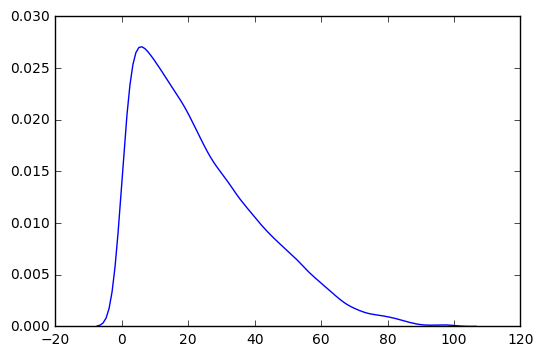

In [248]:
kde = sns.kdeplot(delta_times)

In [284]:
def my_func(x, a, b, c):
    return a * (x**b) * np.exp(-x / c)

In [ ]:
from scipy import 

(None, (0.001, 0.10000000000000001))

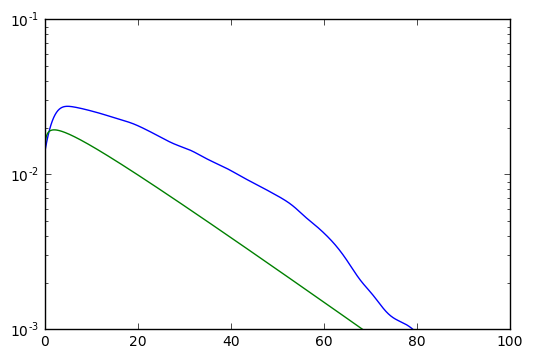

In [283]:
plt.plot(ts, vals)
plt.plot(ts, 0.02*ts**0.1*np.exp(-ts/20))
plt.yscale('log'), plt.ylim(ymin=1e-3)
# plt.xscale('log')